In [1]:
import matplotlib.pyplot as plt
bigfontsize=10
labelfontsize=8
tickfontsize=8
plt.rcParams.update({'font.size': bigfontsize,
                     'axes.labelsize':labelfontsize,
                     'xtick.labelsize':tickfontsize,
                     'ytick.labelsize':tickfontsize,
                     'legend.fontsize':tickfontsize,
                     })


# Теория принятия решений (Decision theory)

Параметры моделей определенные в ходе анализа данных и предсказания моделей являются случайными величинами. В Байесовской интерпретации они описываются функциями плотности вероятности, и доверительными интервалами - в классической. Однако зачастую эти величины интересны интересны не сами по себе, а как основание для принятия решений. 

    Например, клинические исследования предоставляют информацию об эффективности лекарства и его побочных эффектах. На основании этой информации принимается решение о выпуски лекарства в производство.
    
В теории принятия решений агент производит выбор из набора возможных действий $\mathcal{A}$. Этот набор может быть как очень маленьким (выписать лекарство или не выписывать лекарства) так и бесконечно большим (выбор портфеля для инвестиций). Результат каждого действия (его цена и преимущества) зависит от реализации факторов $\mathcal{H}$ неизвестных на момент принятия решения - инвестиции могут оправдаться или прогореть в зависимости от будущего курса акций, лекарство может помочь а может и навредить - в зависимости от неизвестного (на момент принятия лекарства) состояния больного. Зависимость результата действий $a\in\mathcal{A}$ от внешних факторов $h\in\mathcal{H}$ записывается в виде функции потерь (loss function) $l(h,a)$. Функция потерь, как можно понять из называния, описывает потери актора от действия $a$ при наступлении события $h$. 

Хорошим примером связи решений, событий, и потерь является принятие решения о вакцинации. Предсатвим, что на планете свирепствует вирус с летальным исходом для каждого сотого зараженного. Вакцина от этого вируса убивает каждого тысячного, но абсолютно нейтрализует вирус. В этом случае множество решений актора состоит из всего двух элементов - вакцинация и отказ от вакцинации: 

$\mathcal{A} = \{вакцинация,\ отказ\ от\ вакинации\}$.

Неизвестным фактором, соотвественно, является заражение:

$\mathcal{H} = \{заражение,\ природный\ иммунитет\}$.

В качестве потерь актора можно выбрать вероятность летального исхода:


| |Вакцинация|Отказ от вакцинации|
|----------------|--------|----------|
| Заражение | 0.1% | 1% |
| Природный иммунитет| 0.1%|0|


После определения функции потерь, мы можем посчитать совокупный риск каждого решения:

$$R(a|\boldsymbol{x}) =\sum_{h\in\mathcal{H}}l(h,a)p(h|\boldsymbol{x})$$

Совокупный риск равен потерям от принятого решения усредененным по вероятностям различных исходов. Рассчитаем риски вакциаци в примере выше если вероятность именть природный иммунитетет равна 15%. 


$$R(Вакцинация) = 0.1\%*0.85+0.1\%*0.15 = 0.1\%$$

$$R(Отказ от вакцинации) = 1\%*0.85+0\%*0.15 = 0.85\%$$

Решение минимизирующего совокупный риск называется оптимальной стратегией (optimal policy) или Байесовской оценкой (Bayes estimator):

$$\pi^*(\boldsymbol{x}) =  \underset{a\in\mathcal{A}}{argmin}\mathbb{E}_{p(h|x)}[l(h,a)]$$

В некоторых задачах удобнее говорить о выгоде чем о риске. В этом случае вводится фнкция полезности по аналогии с функцией потерь и приняте решение сводится к выобру действия максимизирующую совокупную пользу для всех иходов. Этот подход называется максимизацией ожидаемой пользы (maximum expected utility principle).

## Минимизация риска в машинном обучении

Рассмотрим применение теории решений к задаче классификации, когда мы хотим отнести объект к одному из классов $y\in\mathcal{Y}$ на основе наблюдения $x\in\mathcal{X}$.

Начнем с простейшего случая бинарной классификации с 0-1  функцией потерь: предсказания $z$ и истиные значения клаасов $y$ приналдежат множеству из двух элементов $\{0,1\}$, и функция потерь симметрична:

|  |z = 0|z = 1|
|----------------|--------|----------|
| y = 0|  0 | 1 |
| y = 1| 1|0|

В таком случае, совокупный риск можно записать через апостериорную вероятность верного определения класса:

$$R(z|x) = p(y\neq z|x) = 1 - p(y = z|x)$$


Таким образом, для минимизации совокупного риска нужно выбирать значения $z$ максимизирующие $p(z|x)$:

$$\pi(x) = \underset{z\in\mathcal{Z}}{argmax} p(z|x)$$

Такая оценка соответствует выбору моды апостериорного распределения для каждого входного значения $x$ - это уже знакомя нам оценка максимального апостериорного распределения MAP.

Допустим теперь фукнция потерь несимметрична:  

|  |z = 0|z = 1|
|----------------|--------|----------|
| y = 0|  $l_{00}$ |  $l_{01}$ |
| y = 1| $l_{10}$ |$l_{11}$ |

Пусть $p_0 \equiv p(y=0|x)$ и $p_1 = 1- p_0$. Тогда:

$$R(z = 0|x) = l_{00}p_0 + l_{01}p_1$$
$$R(z = 1|x) = l_{10}p_0 + l_{11}p_1$$

Видно, что решение $z = 0$ минимизирует риск только если 

$$l_{00}p_0 + l_{01}p_1 <  l_{10}p_0 + l_{11}p_1$$

Если $l_{00}=l_{11} = 0$, это неравенство сводится к 

$$p_1<\frac{l_{01}}{l_{01}+l_{10}}$$

Отсюда видно, что если, к примеру, цена ошибки первого рода $l_{10}$ вдвое больше цены ошибки второго рода $l_{01}$, то решение об аттрибуции к классу $0$ нужно принимать только если вероятность принадлежности к этому классу не меньше чем 

$$p_0 = 1 - p_1 \geq 1 - \frac{l_{01}}{l_{01}+l_{10}} = \frac{2}{3}$$

### Матрица ошибок

В общем случае мы хотим узнать как классификатор справляется со своей задачей в зависимости от попрога после которого принимается решение аттрибуции к классу. Это может случиться, например, когда общая цена ошибки может нелинейно зависеть от числа ложно-положительных и истино-положительных срабатываний.

Ложноположительными срабатываниями мы будем называть классификацию объектов класса $y=0$ в класс $z = 1$. Соответственно, общее число ложноположительных(False Positive) срабатываний на выборке $\tau$ записывается как

$$ FP_\tau = \sum\mathbb{I}(z(x_n)=1,y_n=0)$$

Аналогичным обраом мы можем ввести истиноположительные (True Positive) срабаывания (случай $y =1,\ z = 1$), истино отрицательные (True Negative) срабатываения ($y = 0,\ z = 0$) и ложно отрицательные (False Negative) срабатывания ($y = 1, z = 0$). Эти метрики связаны между собой. Нормируя эти величины на суммы истиных событий соответсвенного класса в выборке мы получаем частоты (rates). Например, частота истино положительных решений определяется как число элементов с $y =1,\ z = 1$ нормированое на число элементов с $y = 1$:

$$TPR = p(z = 1|y = 1, \tau) = \frac{TP_\tau}{TP_\tau + FN_\tau}$$

Введеные таким образом частоты составлятют матрицу ошибок:

|  |z = 0|z = 1|
|----------------|--------|----------|
| y = 0|  TNR (Специфичность) |  FPR (Частота ошибок I рода) |
| y = 1| FNR (Частота ошибок II рода) | TPR (Вероятность обнаружения) |

Определние этих метрик на тестовой выборки позволяет сконструировать (вообще говоря бесконечное) множество вспомогательных метрик (F-мера, точность, доля ошибок). Выбор метрики для описания качества работы классификатора в выбраной точке зависит от вида функции потерь. 

Для выбора же точки принятия решений можно использовать кривую ошибок (ROC curve). Эта кривая строится в координатах часты истино положительных решений (True positive rate) в зависимости от частот ложноположительных решений (False positive rate). Каждая точка этой кривой соответсвует значению вероятности после которого принимается решение об аттрибуции объекта к классу 1. Кривая ошибок характеризует модель классификации.

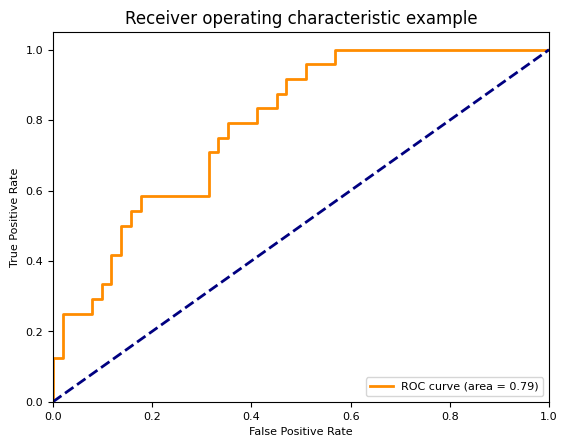

In [2]:
# Example from sklearn documentation: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state=random_state)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### Риск в задачах регрессии

В задачах регресии множество решений агента $\mathcal{A}$ является упорядоченым - то есть вместо выбора одного из нескольких классов мы должны сопоставить в соответсвие входящему вектору значений $\boldsymbol{x}$ некоторое число $a$ в качестве описания истиного значения $h$. Из за упорядоченности возможных значений естесвенным образом появляется ошибка - расстояние между предложеным и истиным значением $(a-h)$.

На основании ошибки можно строить функцию потерь. Например, если в силу постановки задачи потери симметричны и растут быстрее чем ошибка, можно использовать $L2$-потери:

$$l_2(h,a) = (h-a)^2$$

В этом случае, риск описывается как

$$R(a|x) = \mathrm{E}[(h-a)^2|\boldsymbol{x}] = \mathrm{E}[h^2|\boldsymbol{x}] -2a\mathrm{E}[h|\boldsymbol{x}] + a^2 $$

Минимизация риска сводится к минимиазции среднего квадрата ошибок (MSE). Производная в точке минимума риска должны быть равна нулю, а значит

$$\pi(\boldsymbol{x}) \equiv a = \mathrm{E}[h|x] = \int hp(h|x)dh$$

Вид функции потерь зависит от поставленой задачи.

## Вероятностное предсказание

В классическом машинном обучении мы принимаем решение выбирая класс объекта (задача классификации) или число (задача регрессии). В обоих случаях это точечные оценки. В рамках этого курса мы рассмотрели недостатки точечных оценок и предложили использование распрееделение и доверительных интервалов в качестве альтернативы. Если рассматривать теорию принятия решений с вероятностной точки зрения, то решением должен являтся выбор распределения целевой величины. Так, в рамках вероятностного подхода мы считаем что существует "истиное" распределение $h=q(Y|x)$,  действием является выбор некоторого распределения $a = p(Y|x)$, и для минимизации потерь  $\mathrm{E}[l(p,q)]$ мы должны выбрать распределение $q$ наиболее близо к истиному распределению $p$.  

В качестве функции потерь $l(p,q)$ можно использовать уже знакомую нам дивиргенцию Кульбака-Лейблера:

$$l(p, q) \equiv D_{KL} = \sum_{y\in\mathcal{Y}} p(y)\log p(y) -  \sum_{y\in\mathcal{Y}} p(y)\log q(y) $$

Миниизация этой меры по распределнию $q$ сводится к минимизации кросс-энтропии $\mathrm{H}_{ce} \equiv -\sum p(y)\log q(y)$. 
Другим способом оценить расстояние между распределениями является оценка Бриера (Brier score):

$$l_{p,q}\equiv \int (q(y|x)-p(y|x))^2 dy$$
Эта мера симметрична относительно истинного и оценочного распределний и не так чувствительна к маловероятным событиям как кросс-энтропия.

# Байесовская проверка гипотез

Одни и те же данные можно описать большим количеством моделей - от линейных регрессий и деревьев решений до огромных нейронных сетей. Модели могут быть простыми и сложными, параметрическими и непараметрическими, интерпретируемыми и нет. Кажда модель представляет собой гипотезу и выбор наилучшей модели сводится к сравнению гипотез.  

Рассмотрим ситуацию сравнения двух моделей - нулевой $M_0$ (null hypothesis) и альтернативной $M_1$ (alternative hypothesis). Процедура оценки сравнительного правдоподобия гипотез называется проверкой гипотез (hypothesis testing). 

    В одном из заданий курса необходимо оценить вклад событий определенного рода в общее число событий обнаруженых детектором. Эту задачу можно рассмотреть с точки зрения сравнения гипотез - нулевой гипотезой можно признать отсутсвие сигнальных событий в выборке, а альтернативной - их присуттуие. В зависимости от выбора гипотез будет меняться распределение вероятности событий, а соответсвенно и правдоподобие выборок в рамках выбраной гипотезы.
    
Если для выбора гипотезы мы используем 0-1 лосс - функцию (мы получаем пенальти за выбор неправильной гипотезы, а выбор правильной гипотезы не несет никакого пенальти), то самым разумным решением оказывается выбор той гипотезы которая наиболе вероятна при имеющихся данны. То есть мы выбираем альтернативную гипотезу тогда и только тогда когда $p(M_1|\mathcal{D})>p(M_0|\mathcal{D})$. Постериорную вероятность истинности гипотезы можно найти по Байесовскому правилу:

$$p(M|\mathcal{D}) = \frac{p(\mathcal{D}|M)p(M)}{p(\mathcal{D}|M_0)p(M_0) + p(\mathcal{D}|M_1)p(M_1)}$$

Если априорные вероятности равны ($p(M_0)=p(M_1)=0.5$), то выбор гипотезы сводится к сравнению маргинальных функций правдоподобия $p(\mathcal{D}|M_0)$ и $p(\mathcal{D}|M_1)$. Отношение маргинальных функций правдоподобия для двух гипотез называется Байесовским фактором (Bayes factor):

$$B_{1,0} \equiv\frac{p(D|M_1)}{p(D|M_0)} = \frac{\int p(D|\theta_1, M_1)p(\theta_1)d\theta_1}{\int p(D|\theta_0, M_0)p(\theta_0)d\theta_0}$$

Во втором случае интегрирование проходит по всему пространству параметров соответствующих гипотез. Байесовский фактор позволяет сравнивать даже гипотезы различных сложностей - возможность более сложной гипотезы объяснять сложные зависимости (и, как следствие, иметь бОльшие значения функции правдоподобия) компенсируется интегралом по бОльшему пространству параметров. Таким образом маргинальная функция правдоподобия имеет встроенный механизм для пенальти сложных моделей. Этот эффект называется Байесовской бритвой Оккама (Bayesian Occam's razor).


Рассмотрим серию бросков монетки и проверим гипотезу о том что эта монетка симметрична (вероятности получить орла и решку равны).
Нулевая гипотеза - монетка симметрична. Функция правдоподобия равна

$$ P(D|M_0) = \frac{1}{2}^N $$

В случае если монетка не симметрична, среднее значение эксперимента Бернулли будет распределено как  $Beta(\theta|\alpha,\beta)$, где параметры нам не известны. Для данного случая мы можем записать маргинализированную функцию правдоподобия в аналитическом виде:

$$P(D|M_1)\equiv\int p(D|\theta)p(\theta)d\theta = \frac{\mathcal{B}(\alpha_{prior}+N_1,\beta_{prior}+N_0)}{\mathcal{B}(\alpha_{prior},\beta_{prior})} $$

(тут $\mathcal{B}$ это бета-функция, а $\alpha$ и $\beta$ это априорные значения)
Посмотрим как меняется уверенность в симметричности монеты в зависимости от исхода нескольких бросков монеты.

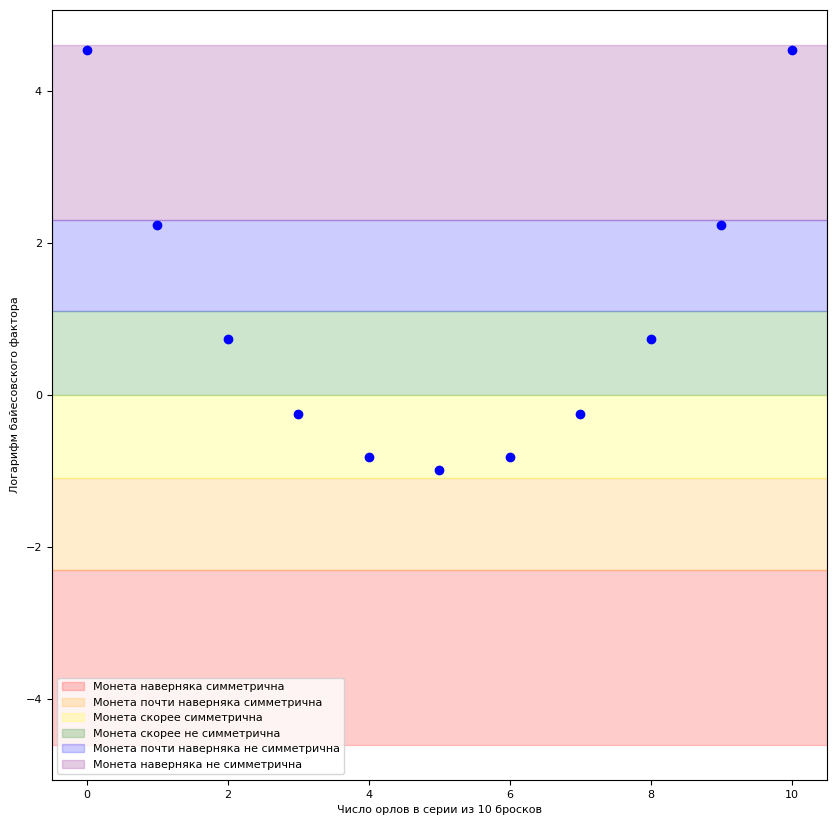

In [3]:
from scipy.special import beta as beta_func
n_toss = 10 # общее число бросков
heads = np.arange(n_toss+1)
a_prior = 1
b_prior = 1
m0_likelihood = [np.log((1/2)**n_toss) for h in heads]
m1_likelihood = [np.log(beta_func(a_prior+h, b_prior+n_toss-h)/beta_func(a_prior, b_prior)) for h in heads]

log_b = np.subtract(m1_likelihood,m0_likelihood)
f = plt.figure(figsize = (10,10))
plt.plot(heads,log_b,'bo')
plt.axhspan(np.log(1/100),np.log(1/10), color = "red", alpha = 0.2,label = "Монета наверняка симметрична")
plt.axhspan(np.log(1/10),np.log(1/3), color = "orange",alpha = 0.2,label = "Монета почти наверняка симметрична")
plt.axhspan(np.log(1/3),np.log(1), color = "yellow", alpha = 0.2,label = "Монета скорее симметрична")
plt.axhspan(np.log(1),np.log(3), color = "green", alpha = 0.2,label = "Монета скорее не симметрична")
plt.axhspan(np.log(3),np.log(10), color = "blue", alpha = 0.2,label = "Монета почти наверняка не симметрична")
plt.axhspan(np.log(10),np.log(100), color = "purple", alpha = 0.2,label = "Монета наверняка не симметрична")
plt.xlabel(f"Число орлов в серии из {n_toss} бросков")
plt.ylabel(f"Логарифм байесовского фактора")
plt.legend()

Величина байесовского фактора говорит не только о более вероятной гипотизе, но и отражает уверенность в разнице гипотез. Общепринятыми являются следующие интерпретации:

| Байесовский фактор |Интерпретация|
|----------------|--------|
| BF < 0.01 |  Решающее свидетельство в пользу нулевой гпотезы |
| 0.01 < BF < 0.1 |  Сильное свидетельство в пользу нулевой гпотезы |
| 0.1 < BF < 0.3(3)|  Умереное свидетельство в пользу нулевой гпотезы |
| 0.3(3) < BF < 1|  Слабое свидетельство в пользу нулевой гпотезы |
| 1 < BF < 3|  Слабое свидетельство в пользу альтернативной гпотезы |
| 3 < BF < 10|  Умереное свидетельство в пользу альтернативной гпотезы |
| 10 < BF < 100|  Сильное свидетельство в пользу альтернативной гпотезы |
| 100 < BF |  Решающее свидетельство в пользу альтернативной гпотезы |

Разумеется, выбор интерпретации значения баейсовского фактора зависит от области примерения и конкретной задачи.

## Кросс-валидация

В практических задачах машинного обучения оптимальную модель выбирают с помощью кросс-валидации. В ходе этой процедуры имеющиеся для обучения данные делится на тренировочную и тестовую подвыборки, и модели обучаются на тренировочных подвыборках и затем происходит сравнение качества предсказания на тестовых выборках. Рассмотрим связь кросс-валидации и байесовского выбора моделей.

Рассмотрим маргинальную функцию правдоподобия записанную в последовательной форме:

$$p(D|m) = \prod_{n=1}^{N}p(y_n|y_{1:n-1},x_{1:N},m) = \prod_{n=1}^{N}p(y_n|x_n, D_{1:n-1},m) $$

Распишем в явном виде маргинальную функцию правдоподобия входящую в произведение:

$$p(y_n|x_n, D_{1:n-1},m) = \int p(y_n|x,\theta )p(\theta| D_{1:n-1},m) d\theta$$

Воспользуемся теперь плагин аппроксимацией и перейдем от интегрирования по $\theta$ на установление значения $\hat{\theta}_m(D_{1:n-1})$ максимизирующее модель $m$ на данных $D_{1:n-1}$:

$$p(y_n|x_n, D_{1:n-1},m) \approx p(y_n|x_n, \hat{\theta}_m(D_{1:n-1}), m)$$

Таким образом, логарифм функции правдоподобия можно записать как 

$$\log p(D|m)\approx \sum_{n=1}^{N}\log p(y_n|x_n,\hat{\theta}_m(D_{1:n-1}), m)$$

Полученная функция похожа на функцию максимизируемую в поэлементной кросс-валидации (leave-one-out cross-validation), где модель выбирается таким образом, чтобы максимизировать правдоподобие полученное при обучении на всей-выборке-кроме-тестового-значения при итерации по всем элементам выборки:

$$\sum_{n=1}^{N}\log p(y_n|x_n,\hat{\theta}_m(D_{1:n-1, n+1:N}), m)$$


## Величина эффекта

Рассморим сравнение двух гипотех в примере ниже. Пусть у нас есть небольшая выборка данных и мы знаем что часть этих данных происходит из равномерного распределения $U(a, b)$. Мы хотим проверить гипотезу есть ли в нашей выборке часть данных происходящих из нормального распредеелния с известным средним и дисперисией $\mathcal{N}(\mu,\sigma)$. Соотвествтенно, мы хотим сравнить две гипотезы - нулевая гипотеза $M_0$ соответсвует равномерному распределению, а альтернативная гипотеза соответсвует сумме $(1-f)\times U(a, b) + times\mathcal{N}(\mu,\sigma)$, где $f$ - свободный параметр модели.

Отфитируем данные с помощью обеих гипотез и посчитаем Байесовский фактор (отметим, что для получения значения маргинализованной функци правдоподобия мы проинтегрируем полученную функцию правдоподобия по пространству параметра $f$ с неинформативным праером).

Text(0.5, 1.0, 'B = 0.518; DLL = 0.137')

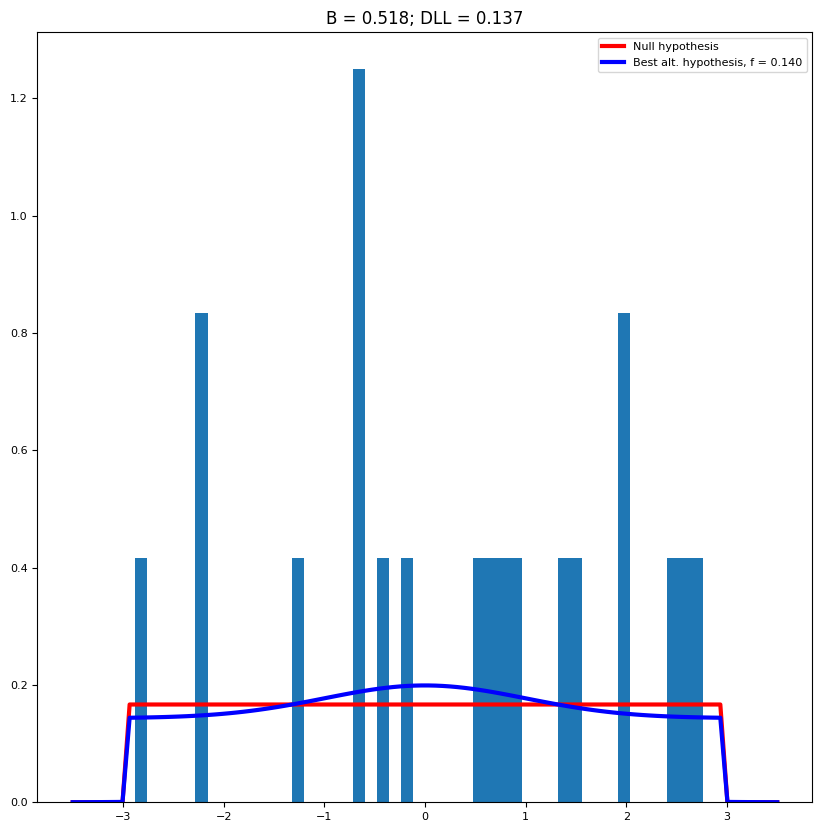

In [4]:
from scipy.stats import norm, uniform
from scipy.optimize import minimize
from scipy.integrate import quad
import matplotlib.pyplot as plt

n_true_norm = 10
n_uniform = 10
sample_size = n_true_norm + n_uniform
true_f = n_true_norm/(n_true_norm+n_uniform)

a = -3
b = 3
mu = 0
sigma = 1

ds = np.concatenate([norm(mu,sigma).rvs(size = n_true_norm),uniform(a,b-a).rvs(size = n_uniform)])

# In case of Null hypothesis, we don't have any parameters and posteiror depends only on sample size
marg_likelihood_0 = (1/(b-a))**sample_size

# For Altrnative hypothesis, lets first compute posteriror of f
def likelihood(f):
    return np.prod(norm(mu,sigma).pdf(ds)*f+(1-f)/(b-a))

def nll(f):
    return -np.sum(np.log(norm(mu,sigma).pdf(ds)*f+(1-f)/(b-a)))


best_f = minimize(nll, 0.5, bounds = [[0,1]]).x[0]

marg_likelihood_1 = quad(likelihood, 0,1)

B = marg_likelihood_1[0]/marg_likelihood_0
DLL = nll(0) - nll(best_f)

f = plt.figure(figsize = (10,10))
_x = np.linspace(a-0.5, b+0.5, 100)
plt.hist(ds, range = (a, b), bins = 50, density = True)
plt.plot(_x, uniform(a,b-a).pdf(_x), color = "red", linewidth = 3, label = "Null hypothesis")
plt.plot(_x, norm(mu,sigma).pdf(_x)*best_f+(1-best_f)*uniform(a,b-a).pdf(_x), color = "blue", linewidth = 3, label = f"Best alt. hypothesis, f = {best_f:.3f}")
plt.legend()
plt.title(f"B = {B:.3f}; DLL = {DLL:.3f}")

В данном случае нулевая гипотеза является частным случаем альтернативной гипотезы, и разница моделей определятся величиной параметра $f$. Так что нам интересно не только какая гипотеза более вероятна, но и _величина эффетка_ (effect size), которая описывается в данном случае величиной $f$.

В задачах машинного обучения логично использовать в качестве величины эффекта разицу в качестве предсказаний конкурирующих моделей. Пусть мы сравниваем два классификатора со средними точностями (accuracy) $\mu_0$ и $\mu_1$. Эффектом в данном случае является разница $\delta = \mu_1 - \mu_0$. Вероятность более высокой точности альтернативной модели, соответсвенно, описывается величиной $p(\delta>0|\mathcal{D})$. Однако на практике решение о выборе смены модели (особенно в сложных системах) принимается на основе величниы $p(\delta>\epsilon|\mathcal{D})$, где $\epsilon$ является некоторой минимальной величной выигрыша в качестве новой модели которая опредлеяется затратами на переход к новой системе.

    Представьте что ваша модель распознавания брака на производственной линии корретно узнает 90% бракованых деталей. Новая модель корректно распознает 90.1%. Даже если вы проведете большое количетсво тестов и будете абсолютно уверены что новая модель работает лучше, смена модели на всем производстве ради выигрыша в 0.1% может оказаться невыгодной.
    
Таким образом, для измереной величны эффекта при сравнении моделей можно ввести регион практической эквивалентности (Region of practical equivalince, ROPE): если величина $\delta$ (или ее модуль - для двустороннего теста) меньше порогового значния $\epsilon$, модели считаются эквивалентными с практической точки зрения. Несложно видеть, что сравнение двух гипотез можно провести анализируя распределение величины $\delta$ - разницы между средними характеристиками моделей. Рассмотрим как получить распределение этой величины не ввязываясь в ресурсоемкие вычисления байесовских факторов.

### Байесовский t-тест

Рассмотрим два классификатора $m_1$ и $m_2$ оцененых на  тестовой выборке из $N$ примеров. Так как мы сравниваем классификаторы на одной и той же выборке, мы можем использовать парный тест (paired test) который является более чувствительным чем общее сравнение средних точностей. В парном тесте мы рассматриваем разницу ошибок предсказаний для каждого примера выборки: $d_i = e^1_i - e^2_i$. В качестве ошибок мы можем использовать $e^{1,2}_i = 1 - p(z_i|m_{1,2})$,  где $z_i$ - истиный класс в примере $i$. Мы предполагаем что разница ошибок распределена нормально $d_i\sim\mathcal{N}(\delta,\sigma^2)$. Интересующее нас распределение записнывается как $p(\delta|\mathcal{D})$, где $\mathcal{D} = \{d_1, d_2, ..., d_N\}$. Можно показать, что при использовании неинформативного праера для параметров $(\delta,\sigma)$ и маргинализации по неинтересующему нас параметру $\sigma$, маргинальное постериорное распределние парамтера $\delta$ будет иметь вид t-распределения Стьюдента с $N-1$ степенями свободы:

$$p(\delta|D) = \mathcal{T}(\delta|\mu,s^2/N)$$

где

$$\mu = \frac{1}{N}\sum_{N}d_i$$
$$s^2 = \frac{1}{N-1}\sum_{N}(d_i-\mu)^2$$

Зная распределение параметра $\delta$ можно легко посичтать вероятность нахождения $\delta$ вне региона практической эквивалентности. 

Еще более простым решением (при наличии большого количества данных) является анализ распределения величин $d_i$ - глядя на это рпсрпеделение можно найти с какой вероятностью велична $d$ находится вне региона практической эквивалентности. Этот способ однако, плохо подходит для двусторонних тестов.

В примере ниже мы сравниваем точность классификатора на основе Гауссовского процесса с классификатором на основе алгритма GBDT. Зону приктической эквивалентности примем равной $\delta < 0.1$  - это односторонний тест с GBDT-классификатором в качестве альтернативной модели.

Text(0.5, 1.0, 'GBDT')

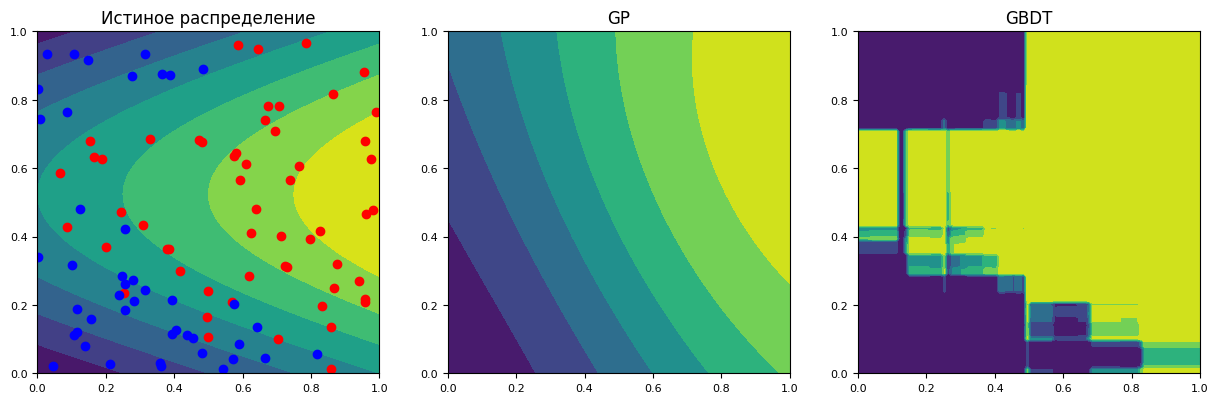

In [5]:
from scipy.stats import norm, t
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier


rel_variance = 0.2

x_1 = np.random.random(100)
x_2 = np.random.random(100)
x = np.array(list(zip(x_1, x_2)))
def func_mean(x_1, x_2):
    return x_1+np.sin(x_2 * 3)


y_true = func_mean(x_1, x_2)
y = np.array([norm(y, rel_variance*y).rvs()-1 for y in y_true ])>0

cls_0 = GaussianProcessClassifier()
cls_0.fit(x, y)
cls_1 = GradientBoostingClassifier()
cls_1.fit(x, y)


import matplotlib.pyplot as plt
xp_1 = np.linspace(0,1,100)
xp_2 = np.linspace(0,1,100)
xs_1, xs_2 = np.meshgrid(xp_1, xp_2)

xs = np.array(list(zip(xs_1.flatten(), xs_2.flatten())))

ys = func_mean(xs_1, xs_2)
y_pred_0 = cls_0.predict_proba(xs).T[1]
y_pred_1 = cls_1.predict_proba(xs).T[1]



f, ax = plt.subplots(1, 3, figsize = (15, 5))

ax[0].contourf(xp_1, xp_2, ys)
ax[0].scatter(x_1[y], x_2[y], color = "red")
ax[0].scatter(x_1[~y], x_2[~y], color = "blue")
ax[0].axis('scaled')
ax[0].set_title("Истиное распределение")
ax[1].contourf(xp_1, xp_2, y_pred_0.reshape(100, 100))
ax[1].axis('scaled')
ax[1].set_title("GP")
ax[2].contourf(xp_1, xp_2, y_pred_1.reshape(100, 100))
ax[2].axis('scaled')
ax[2].set_title("GBDT")

# ax[0].colorbar()


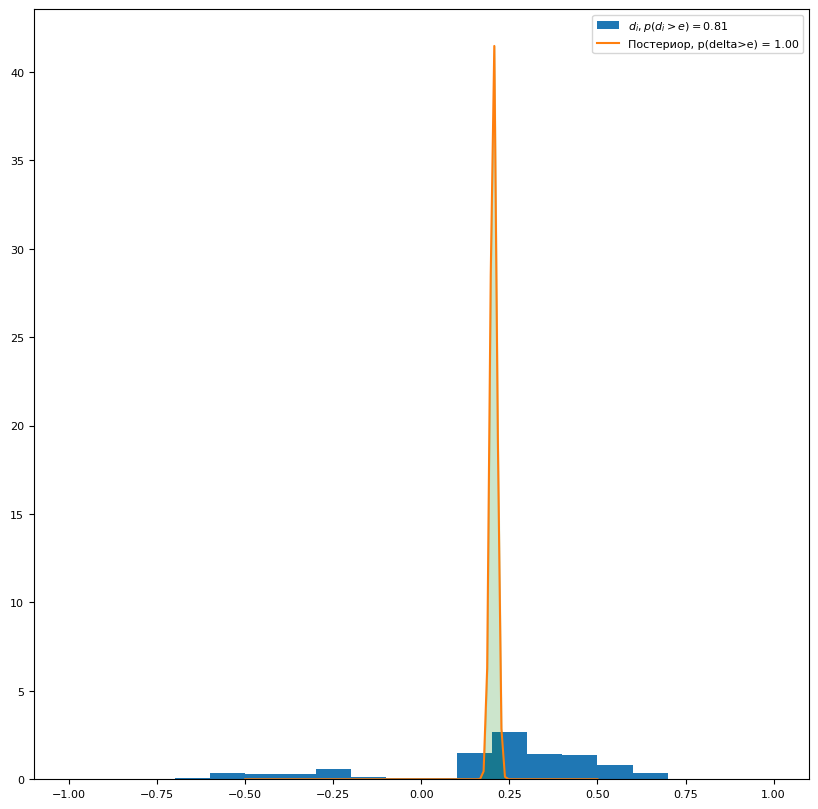

In [6]:
n_cv = 1000
epsilon = 0.1

test_x_1 = np.random.random(n_cv)
test_x_2 = np.random.random(n_cv)
x_test = np.array(list(zip(test_x_1, test_x_2)))
y_true_test = func_mean(test_x_1, test_x_2)
y_test = np.array([norm(y, rel_variance*y).rvs()-1 for y in y_true_test ])>0

y_miss_0_cl0 = cls_0.predict_proba(x_test)[y_test].T[0]
y_miss_1_cl0 = cls_1.predict_proba(x_test)[y_test].T[0]
y_miss_0_cl1 = cls_0.predict_proba(x_test)[~y_test].T[1]
y_miss_1_cl1 = cls_1.predict_proba(x_test)[~y_test].T[1]

y_miss_0 = np.concatenate([y_miss_0_cl0, y_miss_0_cl1])
y_miss_1 = np.concatenate([y_miss_1_cl0, y_miss_1_cl1])

d = y_miss_0 - y_miss_1

mu = d.mean()
s2 = d.std()**2*n_cv/(n_cv-1)

posterior_d = t(df = n_cv-1, loc = mu, scale = (s2/n_cv)**0.5)

prob_no_ROPE = 1 - posterior_d.cdf(epsilon)
approx_prob_no_ROPE = len(d[d>epsilon])/len(d)

_d = np.linspace(-0.5, 0.5, 100)
f = plt.figure(figsize = (10,10))
plt.hist(d, range = [-1, 1], bins = 20, density = True, label = f"$d_i, p(d_i>e) = {approx_prob_no_ROPE:.2f}$" )
plt.plot(_d, posterior_d.pdf(_d), label = f"Постериор, p(delta>e) = {prob_no_ROPE:.2f}")
plt.fill_between(_d, posterior_d.pdf(_d), where = _d > epsilon, color = "green", alpha = 0.2)
plt.legend()


### Сравнение моделей на разных выборках

Если сравниваемые модели оцениваются на разных выборках, мы должны перейти от срванения вероятностей к сравнению часот верного определения на этих выборках. Если модель правильно определа класс у $y_m$ примеров на выборке из $N_m$, то частота верного определния на этой выборке составляет $y_m/N_m$. Если мы предоположим что количество парвильно определенных классов распределено биномиально $y_m\sim \text{Bin}(N_m,\theta_m)$, то качество модели описывается параметром $\theta$, эффект - разницей этих параметров $\delta = \theta_1 - \thata_2$, а данные на которых ма сравниваем качество моделей - набором из четырех чисел $\mathcal{D} = (y_1, N_1, y_2, N_2)$. Выпишем потсериорное распределение для параметров $\theta_1$ и $\theta_2$ в явном виде:

$$p(\theta_1, \theta_2|\mathcal{D}) = \mathcal{B}(\theta_1|y_1+1, N_1-y_1+1)\mathcal{B}(\theta_2|y_2+1, N_2-y_2+1)$$

(Мы использовали неинформативный праер для параметров $\theta_{1,2}$)

Апостреирорное распределение для парметра $\delta$ задается в таком случае интегралом по пространству $(\theta_1, \theta_2)$:

$$p(\delta|\mathcal{D}) = \int_{0}^{1}\int_{0}^{1}\mathbb{I}(\delta = \theta_1-\theta_2)p(\theta_1|\mathcal{D})p(\theta_2|\mathcal{D})d\theta_1d\theta_2 $$
$$p(\delta|\mathcal{D}) = \int_{0}^{1} \mathcal{B}(\theta_1|y_1+1, N_1-y_1+1)\mathcal{B}(\theta_1-\delta|y_2+1, N_2-y_2+1) d\theta_1 $$

Как и в случае с t-тестом, для определения вероятности выхода за пределы ROPE достаточно посчитать интеграл от постериорного расрпделения $p(\delta|D)$ по интересующей нас области. Например:

$$p(\delta>\epsilon|\mathcal{D}) = \int_{\epsilon}^{\infty}p(\delta|\mathcal{D})d\delta$$

### A/B тестирование

Этот подход сравнения гипотез широко применим за пределами оценки качества классификаторов. Например, его можно использовать для байесовского анализа результатов  A/B тестировния. Представим что мы сравниваем две версии веб-страницы цель которой вовлечь пользователя во взаимодействие. Две версии работают одновременно и результат можно записать в виде таблицы сопраженности (contigency table):


| |Пользователь провзаимодейтсвовал | Не провзаимодейтсвовал| |
|----------------|--------|--------------------------| |
| Версия A | 10 | 1000| $N_1 = 1010$| 
| Версия B | 17 | 1870| $N_2 = 1887$| 

Построим распределение величны $\delta$ и найдем с какой вероятностью версия $B$ лучше версии $A$ на 1%.

Text(0.5, 0, 'Величина эффекта')

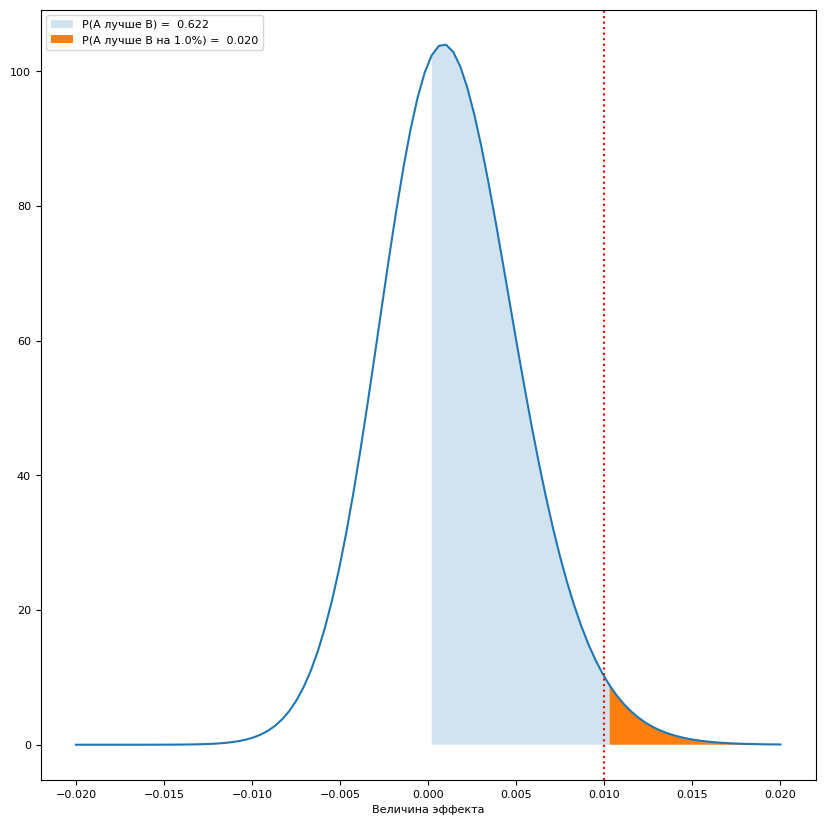

In [7]:
from scipy.stats import beta
from scipy.integrate import quad

y_1 = 10
y_2 = 17
N_1 = 1010
N_2 = 1887
epsilon = 0.01

Beta_1= beta(a = y_1+1, b = N_1 - y_1 + 1)
Beta_2= beta(a = y_2+1, b = N_2 - y_2 + 1)

def delta_posterior(d):
    return quad(lambda x : Beta_1.pdf(x)*Beta_2.pdf(x-d), 0,1)[0]

_d = np.linspace(-0.02, 0.02, 100)
post_shape = [delta_posterior(_) for _ in _d]

f = plt.figure(figsize = (10, 10))
plt.plot(_d, post_shape)
plt.fill_between(_d, post_shape, where = _d > 0, alpha = 0.2, label = f"P(A лучше B) =  {quad(delta_posterior, 0, 0.02)[0]:.3f}")
plt.fill_between(_d, post_shape, where = _d > epsilon, label = f"P(A лучше B на {epsilon*100}%) =  {quad(delta_posterior, epsilon, 0.02)[0]:.3f}")
plt.axvline(epsilon, color = "red", ls = ":")
plt.legend()
plt.xlabel("Величина эффекта")

# Классическая проверка гипотез

В классической статистике отстутсвует априорное и постериорное распределение параметров, но присутствует функция правдоподобия. Поэтому сравнение маргинализированных функций правдоподобия превращается в сравнение максимумов функции правдоподобия для принятия решения:

$$\frac{p(H_0|\mathcal{D})}{p(H_1|\mathcal{D})} \approx \frac{max_{\theta\in H_0}p_\theta(\mathcal{D})}{max_{\theta\in H_1}p_\theta(\mathcal{D})}$$

Приближенность значения здесь возникает из-за того что вместо рассмотрения всех возможных значенй параметра $\theta$ мы воспользовались плагин-аппороксимацией и использовали только тот параметр который обеспечивает максимум функции правдоподобия. 

## Теорема Уилкса

В отличие от байесовского фактора отношение максимумов функции правдоподбия не имеет пенальти за слоность модели, а значит более сложная модель будет иметь выше правдоподбия. Отсутствие байесовского фактора так же означает и необходимость в новом способе оценки значимости эффекта. В байесовской статистике мы могли использовать байесовский фактор для оценки того насколько мы уверены в превосходстве одной гипотезы над другой. В классической статистике на помошь приходит теорема Уилкса (Wilk's theorem). Она гласиит, что с ростом выборки распределение статистики  $-2\log(\mathcal{L}_0/\mathcal{L}_1)$ приближается к распределению $\chi_2$ с числом степеней свободы равному разнице количества свободных параметров моделей 0 и 1. Знание величины  $-2\log(\mathcal{L}_0/\mathcal{L}_1)$ позволяет оценить _значимость_  (significance) новой модели. Значимость можно интерпретировать как вероятность получить выборку так хорошо описываемую моделью 1, как получилось в обнаруженных данных при условии истинности модели 0. Эта процедура называется оценкой значимости нулевой гипотезы (null hypothesis significance testing, NHST).

Вернемся к примеру с фитированием суммы равномерного и нормального распрееделний. Так как нулевая гипотеза является частным случаем альтернативной гипотезы (с $f = 0$), то мы можем просканировать значения параметра $f$ и построить зависимость обратной удвоенной разницы логарифмов функций правдоподобия от значения $f$. Значение $-2\Delta\log\mathcal{L}$ соотвествующее разнице нулевой и альтернативной гипотез будет совпадать со значением полученного профиля в $f=0$.

Нулевая гипотеза не имеет свободных параметров, а альтернативная гипотеза имеет 1 свободный параметр. Соответственно, удвоенная разница логарифмов функции правдоподобия будет распределена как хи-квадрат с оддой степенью свободы. Посмотрим как по теореме Уилкса зависит вероятность получить выборку подходящую модели 1 так же или лучше (p-value) в зависимости от параметров проблемы.

$$\text{p-value}(test(\mathcal{D}))\equiv Pr(test(\tilde{\mathcal{D}})\geq test(\mathcal{D})|\tilde{\mathcal{D}}\sim H_0)$$

<>:49: SyntaxWarning: invalid escape sequence '\D'
<>:49: SyntaxWarning: invalid escape sequence '\D'
/var/folders/l5/w6ywt87n3hndth2tt3n3rrvc0000gp/T/ipykernel_36285/141137141.py:49: SyntaxWarning: invalid escape sequence '\D'
  ax[1].set_ylabel("$-2\Delta\log\mathcal{L}$")


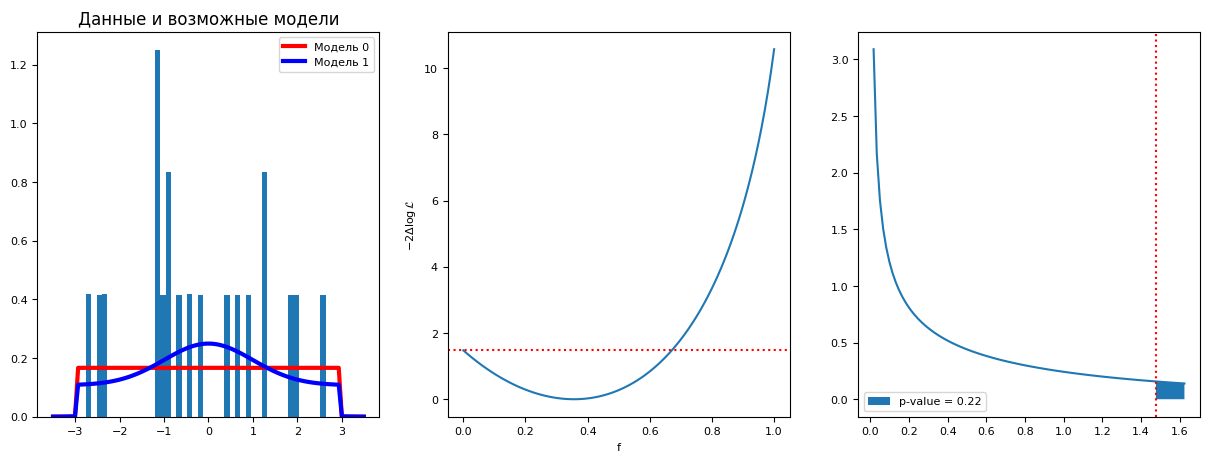

In [8]:
import numpy as np
from scipy.stats import norm, uniform, chi2
from scipy.optimize import minimize
from scipy.integrate import quad
import matplotlib.pyplot as plt


n_true_norm = 10
n_uniform = 10
sample_size = n_true_norm + n_uniform
true_f = n_true_norm/(n_true_norm+n_uniform)

a = -3
b = 3
mu = 0
sigma = 1

ds = np.concatenate([norm(mu,sigma).rvs(size = n_true_norm),uniform(a,b-a).rvs(size = n_uniform)])

# In case of Null hypothesis, we don't have any parameters and posteiror depends only on sample size
marg_likelihood_0 = (1/(b-a))**sample_size

# For Altrnative hypothesis, lets first compute posteriror of f
def likelihood(f):
    return np.prod(norm(mu,sigma).pdf(ds)*f+(1-f)/(b-a))

def nll(f):
    return -np.sum(np.log(norm(mu,sigma).pdf(ds)*f+(1-f)/(b-a)))

best_f = minimize(nll, 0.5, bounds = [[0,1]]).x[0]

marg_likelihood_1 = quad(likelihood, 0,1)

B = marg_likelihood_1[0]/marg_likelihood_0
DLL = nll(0) - nll(best_f)

_, ax = plt.subplots(1,3,figsize = (15,5))
_x = np.linspace(a-0.5, b+0.5, 100)
ax[0].hist(ds, range = (a, b), bins = 50, density = True)
ax[0].plot(_x, uniform(a,b-a).pdf(_x), color = "red", linewidth = 3, label = "Модель 0")
ax[0].plot(_x, norm(mu,sigma).pdf(_x)*best_f+(1-best_f)*uniform(a,b-a).pdf(_x), color = "blue", linewidth = 3, label = f"Модель 1")
ax[0].legend()
ax[0].set_title(f"Данные и возможные модели")

_f = np.linspace(0,1,100)
ax[1].plot(_f,[2*(nll(_)-nll(best_f)) for _ in _f])
ax[1].set_xlabel("f")
ax[1].axhline(2*DLL, color = "red", ls = ":")
ax[1].set_ylabel("$-2\Delta\log\mathcal{L}$")

_dll = np.linspace(0, 1.1*2*DLL, 100)
ax[2].plot(_dll, chi2(df=1).pdf(_dll))
ax[2].fill_between(_dll, chi2(df=1).pdf(_dll), where = _dll>2*DLL, label = f"p-value = {1-chi2(df=1).cdf(2*DLL):.2f}")
ax[2].axvline(2*DLL, color = "red", ls = ":")
ax[2].legend()
